In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix


In [2]:
data = pd.read_csv('mush.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Text(0.5, 1.0, 'Mushroom Class Distribution')

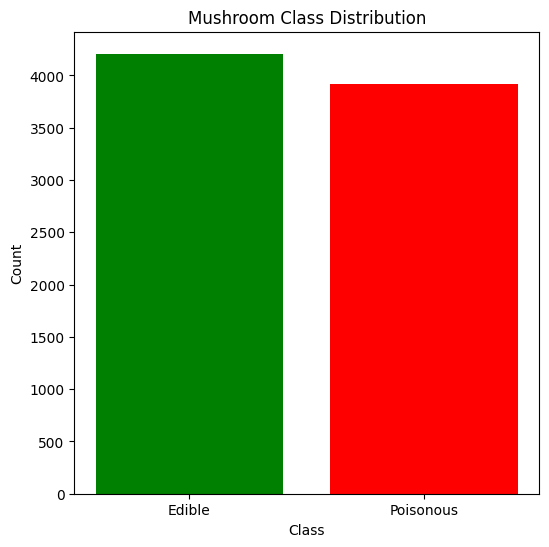

In [6]:
# Visual graph  Edible vs Poisonous
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(x=['Edible', 'Poisonous'], height=data['class'].value_counts().values, color=['green','red'])

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Mushroom Class Distribution')

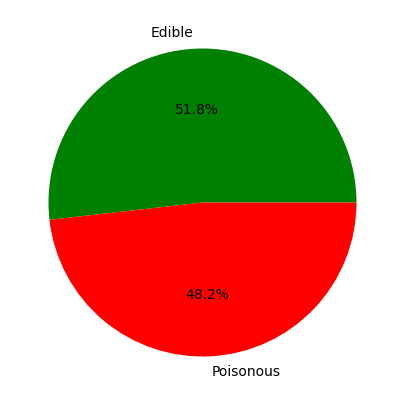

In [7]:
# Pie chart to show % of edible and poisonous mushrooms in my data set.
plt.figure(figsize = (5,5))

plt.pie(data['class'].value_counts(), colors = ['green','red'], labels = ['Edible', 'Poisonous'], autopct='%1.1f%%')

plt.show()

As seen from the pie chart , the red part represents the percentage of the poisonous mushrooms in the dataset. 
The green part represents  the percentage of edible mushrooms. The percentages of these classes are really close to each other.
I can be sure our data set is balanced.

I'm  using the LabelEncoder class from the sklearn.preprocessing module to transform the categorical variables in the data DataFrame into numerical labels.

leb_en = LabelEncoder() - This creates a new instance of the LabelEncoder class and assigns it to the variable leb_en.

df = data.apply(LabelEncoder().fit_transform) - I'm applying the fit_transform() method of the LabelEncoder class to each column of the data DataFrame using the apply() method.

In [8]:

leb_en = LabelEncoder()

df = data.apply(LabelEncoder().fit_transform)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


<AxesSubplot: >

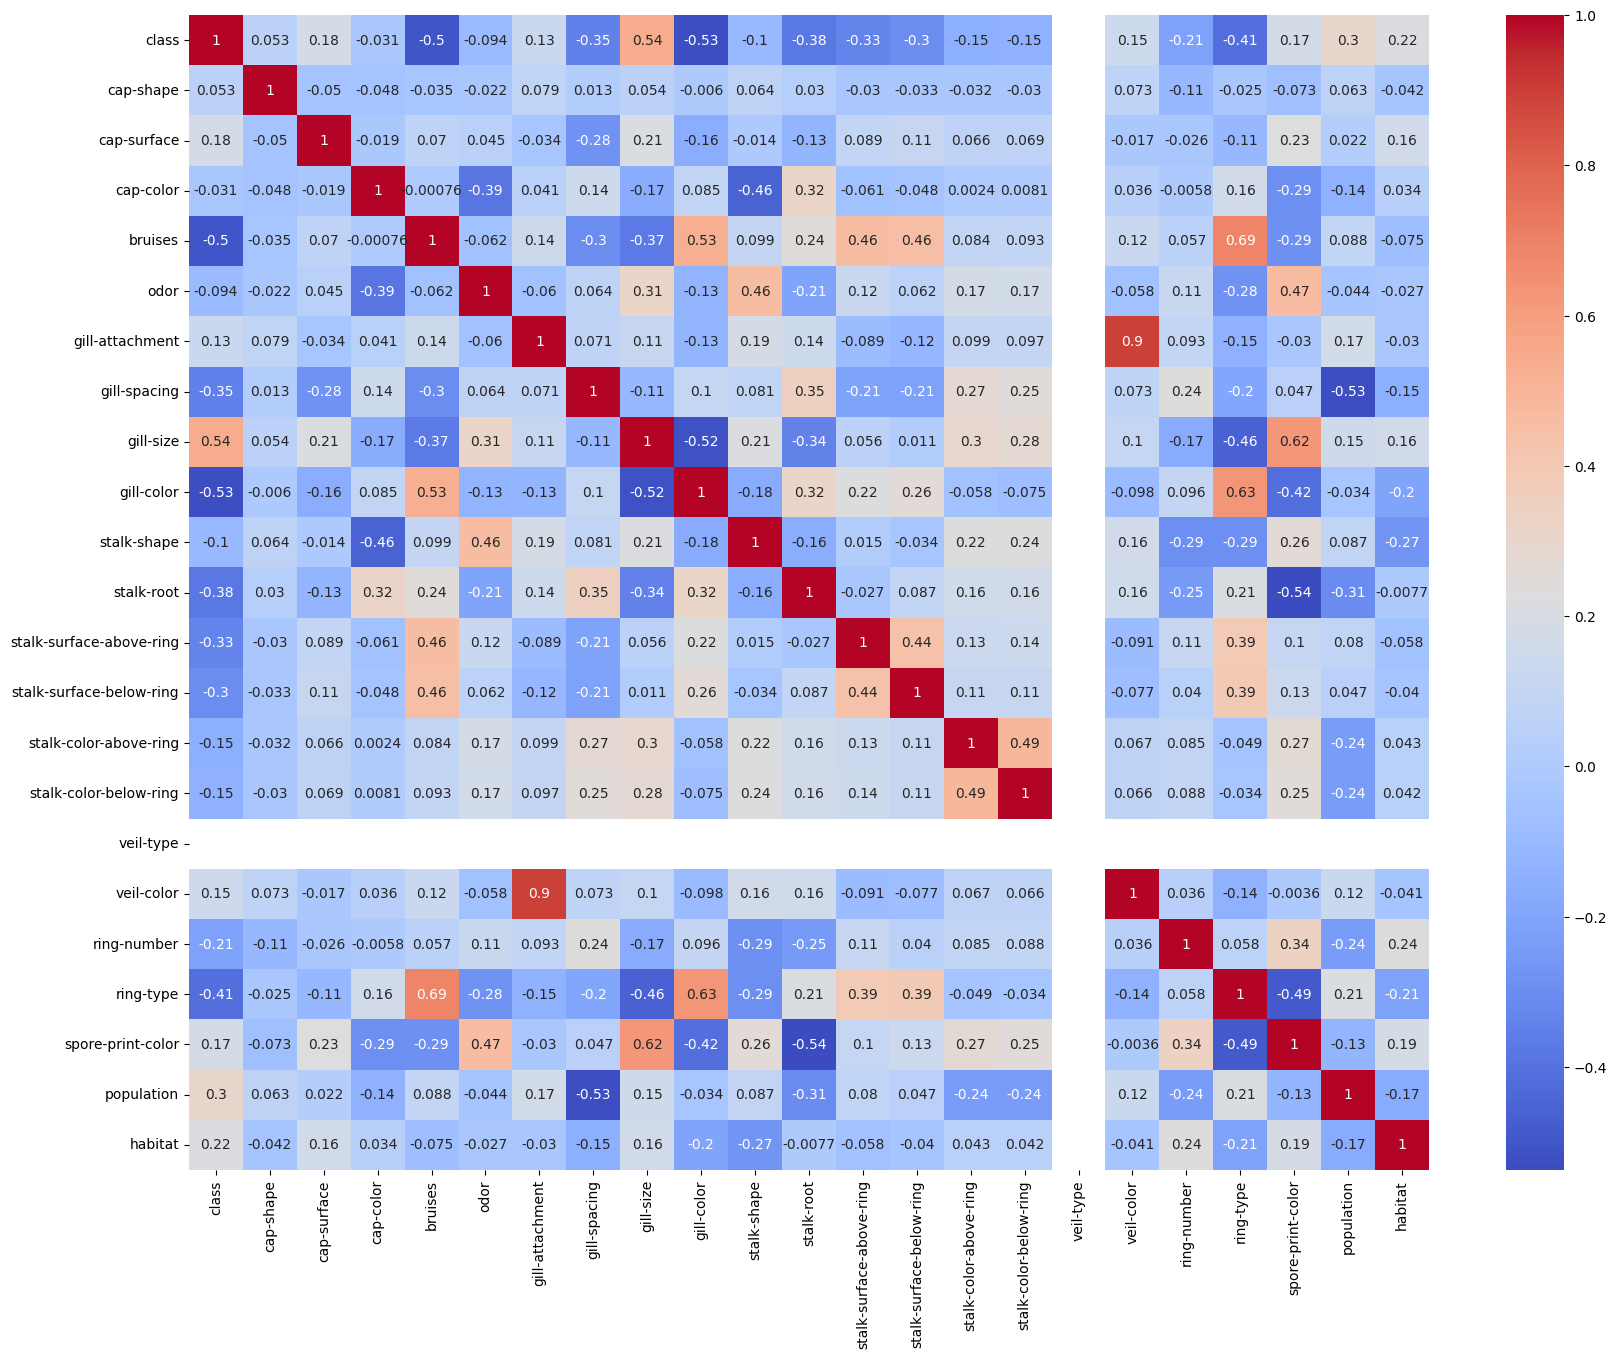

In [10]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [11]:
df["veil-type"].unique()

array([0])

I have spotted that veil type had only one unique value (used df.describe min, max, and std, all showed the same value 0).
I decide to create heatmap and use df["veil-type"].unique() to confirm it. 
After being sure about it, I  decided to drop the column.

In [12]:

df.drop(["veil-type"],axis=1, inplace = True)

I have created new heatmap to show clearly correlation between my columns after dropping veil-type column

<AxesSubplot: >

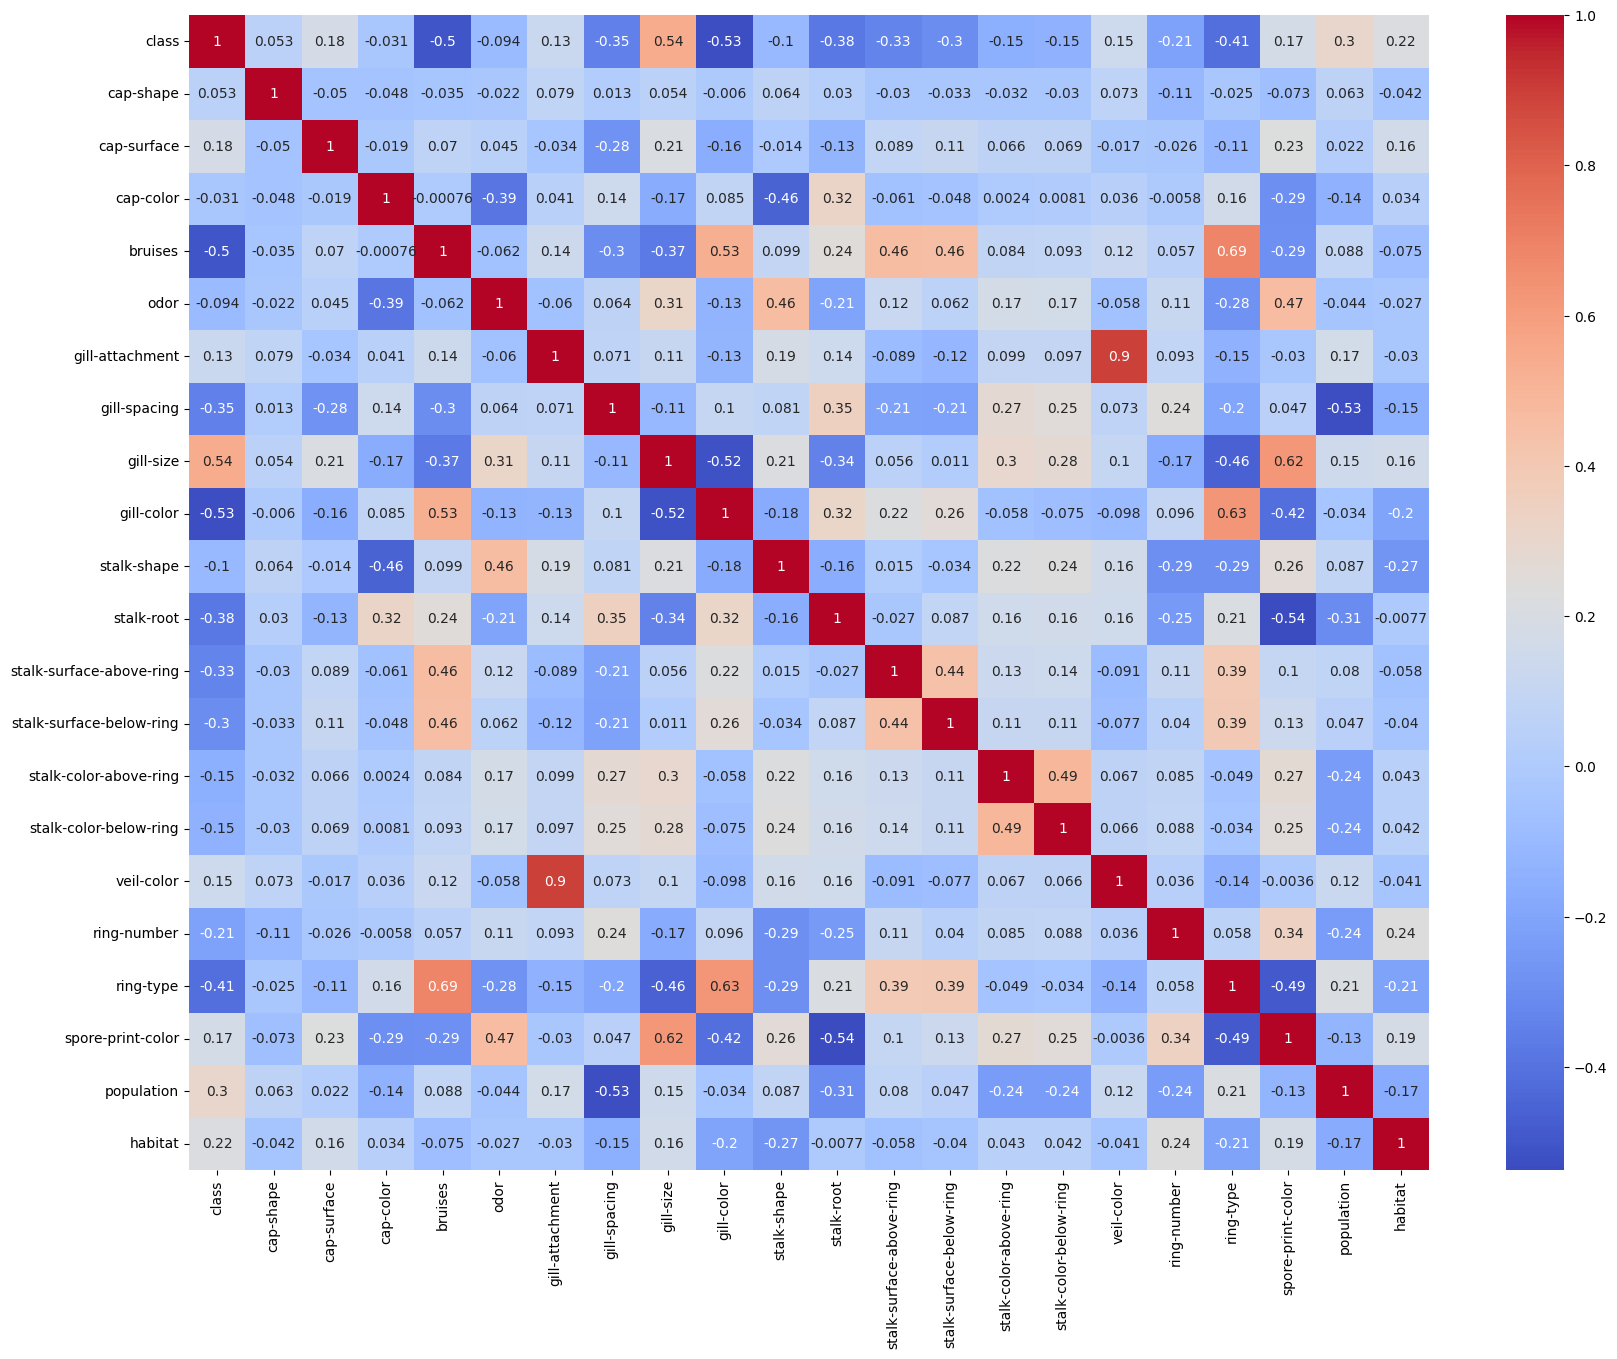

In [13]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

From this heatmap we can clearly see that:
veil color and gill attachment which have highest  positively correlated relationship (0.9).

class and gill size are highly positively correlated( 0.54 , I will use column 'class' as my y in ML).

X contains all the columns of the original DataFrame except for the 'class' column, which I've dropped using the drop() method with axis=1 parameter. This will allow that X will have all the independent variables (features) that will be used to predict the target variable.

y contains only the 'class' column from the original DataFrame, which is the dependent variable(target variable) that I want to predict.

By splitting the data into X and y, I can use the X data to train a model and the y data to evaluate the model's performance.


In [14]:
#Preparation ML
X = df.drop(['class'] , axis = 1)
y = df['class']

This line of code is used to split a dataset into training and testing sets using the train_test_split() function from the scikit-learn library.

test_size parameter is set to 0.3, which means that 30% of the data  will be used for testing, and 70% will be used for training.

The random_state parameter is set to 42, which is based on my personal choice , it's used to initialize the random number generator.This ensures that the same split is obtained every time when the code is run, making the result always same for my random_state.

In [15]:
#Train/Test/Split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

I'm creating a logistic regression model and fits it to the training data (X_train and y_train) using the LogisticRegression() class from the scikit-learn library.



In [16]:
# Logistic Regression Model
log_LR = LogisticRegression().fit(X_train,y_train)

 I'm using the trained logistic regression model to make predictions on the testing data and stores the predicted values in the y_pred_LR variable, which is a one-dimensional NumPy array containing the predicted values for the testing data.

In [17]:
y_pred_LR = log_LR.predict(X_test)

I'm calculating the accuracy of the logistic regression model by comparing the predicted values (y_pred_LR) with the actual values in the testing data (y_test).

In [18]:
accuracy_score(y_test , y_pred_LR)

0.9499589827727646

I'm using confusion_matrix() function from the scikit-learn library  to create a confusion matrix based on the predicted values (y_pred_LR) and actual values (y_test) of the logistic regression model.

I'm creating classification_report() from the scikit-learn library to create a report that summarizes the performance of the logistic regression model on the testing data (y_test).

In [19]:
cm_lr= confusion_matrix(y_test, y_pred_LR)

print(cm_lr)
print(classification_report(y_test, y_pred_LR))

[[1200   57]
 [  65 1116]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



I'm using plot_confusion_matrix() function  from the mlxtend library  to create a graphical representation of the confusion matrix produced by a classification model.

The plot_confusion_matrix() function takes several arguments:

conf_mat(mandatory,specifies the confusion matrix to be plotted): the confusion matrix produced by the classification model.

figsize(optional, got default setting 10,10 if not specified): a tuple that specifies the width and height of the plot.

cmap(optional): the color map used to color the plot.


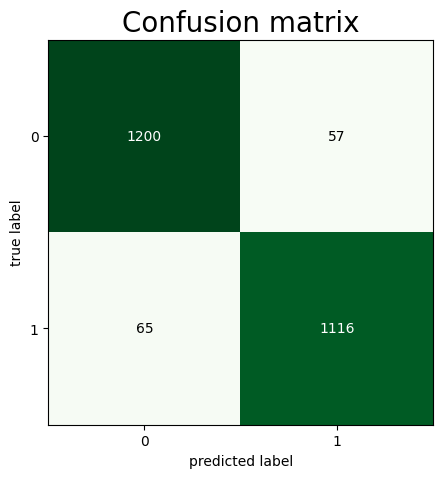

In [20]:
fig , ax =plot_confusion_matrix(conf_mat=cm_lr, figsize=(5,5),cmap=plt.cm.Greens)


plt.title('Confusion matrix',fontsize=20)

plt.show()

I'm creating pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR}) , a DataFrame object  with two columns, 'Actual' and 'Predicted'. The data in the 'Actual' column is taken from the y_test variable, which contains the true class labels of the test data. The data in the 'Predicted' column is taken from the y_pred_LR variable, which contains the predicted class labels generated by the logistic regression model on the test data. That way I can see clearly how well my test model performs comparing to actual data set.

In [21]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR})

,Actual,Predicted
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
462,0,0
1956,0,0
3781,1,1
799,0,0


In [22]:
# Gaussian Naive Bayes model

nb_model = GaussianNB().fit(X_train,y_train)

In [23]:
y_pred_nb = nb_model.predict(X_test)

In [24]:
accuracy_score(y_test , y_pred_nb)

0.9294503691550451

In [25]:
cm_nb=confusion_matrix(y_test, y_pred_nb)
print(cm_nb)


print(classification_report(y_test, y_pred_nb))

[[1172   85]
 [  87 1094]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



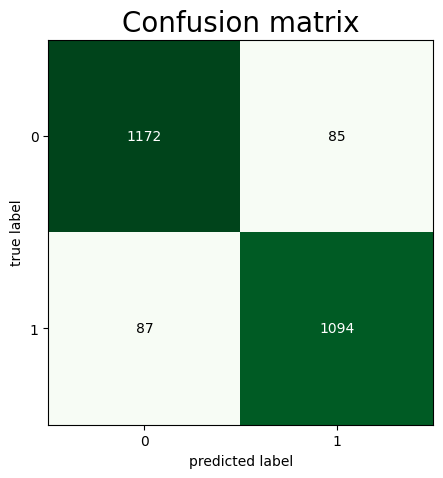

In [26]:
fig , ax =plot_confusion_matrix(conf_mat=cm_nb, figsize=(5,5),cmap=plt.cm.Greens)


plt.title('Confusion matrix',fontsize=20)

plt.show()

In [27]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nb})

,Actual,Predicted
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
462,0,0
1956,0,0
3781,1,1
799,0,0


In [28]:
#Support Vector Machine
svm_model= SVC().fit(X_train,y_train)

In [29]:
y_pred_svm = svm_model.predict(X_test)

In [30]:
accuracy_score(y_test , y_pred_svm)

0.9901558654634947

In [31]:
cm_svm= confusion_matrix(y_test, y_pred_svm)

print(cm_svm)
print(classification_report(y_test, y_pred_svm))

[[1254    3]
 [  21 1160]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



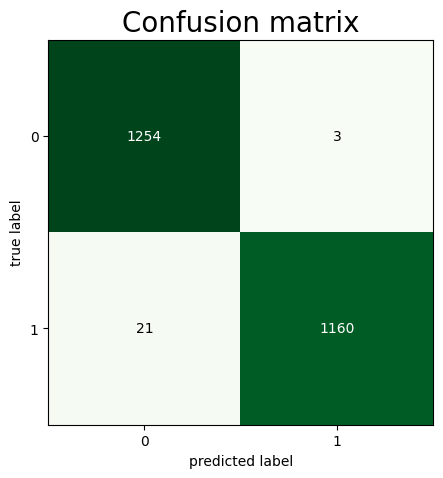

In [32]:
fig , ax =plot_confusion_matrix(conf_mat=cm_svm, figsize=(5,5),cmap=plt.cm.Greens)


plt.title('Confusion matrix',fontsize=20)

plt.show()

In [33]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})

,Actual,Predicted
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
462,0,0
1956,0,0
3781,1,1
799,0,0


Conclusion : 

I can see that working on this data set my Logistic Regression model fit well reaching 95%.

My Gaussian Naive Bayes model did still perform really well (reaching 93 %) but the best fit was 
SVM (Support Vector Machine) which reach 99%.

I can confirm that you can use mushrooms characteristics to determine if the mushroom is poisonous or not
(class vs gill size highly correlated for example).